<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/chronic_kidney_diseases_prediction_updated_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook

Follow the steps:-

    1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
    2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 2 upto 4 (these cell should only one time)


In [545]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [546]:
!kaggle datasets download -d mansoordaku/ckdisease

ckdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [547]:
import zipfile
zip = zipfile.ZipFile("/content/ckdisease.zip",'r')
zip.extractall("/content")
zip.close()

In [548]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [549]:
df=pd.read_csv('kidney_disease.csv',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [550]:
df.shape

(400, 25)

In [551]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [552]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [553]:
df.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
189,64.0,60.0,1.010,4.0,1.0,abnormal,abnormal,notpresent,present,239.0,...,29,7500,3.4,yes,yes,no,poor,yes,no,ckd
390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,52,6300,5.3,no,no,no,good,no,no,notckd
122,34.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,NaN,...,NaN,NaN,NaN,yes,no,no,good,no,yes,ckd
349,35.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,82.0,...,52,9400,6.1,no,no,no,good,no,no,notckd
255,34.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,121.0,...,52,9200,6.3,no,no,no,good,no,no,notckd


In [554]:
# Number of times to replicate the DataFrame
replications = 5200 // 400  # 4 times in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 52000 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)
df=pd.DataFrame(expanded_df)

<ipython-input-554-efa6bae8ab1d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [555]:
df.shape

(5200, 25)

In [556]:
df['classification'].value_counts()

ckd       3224
notckd    1950
ckd\t       26
Name: classification, dtype: int64

### **Data Preparations**
1. Data Cleaning
2. Data Explorations
3. Data Splitting
4. Feature Engineering
5. Model Training
6. Model Improvements

### **1. Data Cleaning**

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5083 non-null   float64
 1   bp              5044 non-null   float64
 2   sg              4589 non-null   float64
 3   al              4602 non-null   float64
 4   su              4563 non-null   float64
 5   rbc             3224 non-null   object 
 6   pc              4355 non-null   object 
 7   pcc             5148 non-null   object 
 8   ba              5148 non-null   object 
 9   bgr             4628 non-null   float64
 10  bu              4953 non-null   float64
 11  sc              4979 non-null   float64
 12  sod             4069 non-null   float64
 13  pot             4056 non-null   float64
 14  hemo            4524 non-null   float64
 15  pcv             4290 non-null   object 
 16  wc              3835 non-null   object 
 17  rc              3510 non-null   o

In [558]:
df.isnull().sum()

age                117
bp                 156
sg                 611
al                 598
su                 637
rbc               1976
pc                 845
pcc                 52
ba                  52
bgr                572
bu                 247
sc                 221
sod               1131
pot               1144
hemo               676
pcv                910
wc                1365
rc                1690
htn                 26
dm                  26
cad                 26
appet               13
pe                  13
ane                 13
classification       0
dtype: int64

In [559]:
age_m=df['age'].mean()
df['age']=df['age'].fillna(age_m)

In [560]:
df['age']=df['age'].astype(int)

In [561]:
bp_mean=df['bp'].mean()
df['bp']=df['bp'].fillna(bp_mean)

In [562]:
sg_m=df['sg'].mean()
df['sg']=df['sg'].fillna(sg_m)

In [563]:
al_m=df['al'].mean()
df['al']=df['al'].fillna(al_m)

In [564]:
su_m=df['su'].mean()
df['su']=df['su'].fillna(su_m)

In [565]:
rbc_m=df['rbc'].mode()
print(rbc_m)
df['rbc']=df['rbc'].fillna('normal')

0    normal
Name: rbc, dtype: object


In [566]:
pc_m=df['pc'].mode()
print(pc_m)
df['pc']=df['pc'].fillna('normal')

0    normal
Name: pc, dtype: object


In [567]:
pcc_m=df['pcc'].mode()
print(pcc_m)
df['pcc']=df['pcc'].fillna('notpresent')

0    notpresent
Name: pcc, dtype: object


In [568]:
ba_m=df['ba'].mode()
print(ba_m)
df['ba']=df['ba'].fillna('notpresent')

0    notpresent
Name: ba, dtype: object


In [569]:
bgr_m=df['bgr'].mean()
df['bgr']=df['bgr'].fillna(bgr_m)

In [570]:
bu_m=df['bu'].mean()
df['bu']=df['bu'].fillna(bu_m)

In [571]:
sc_m=df['sc'].mean()
df['sc']=df['sc'].fillna(sc_m)

In [572]:
sod_m=df['sod'].mean()
df['sod']=df['sod'].fillna(sod_m)

In [573]:
pot_m=df['pot'].mean()
df['pot']=df['pot'].fillna(pot_m)

In [574]:
hemo_m=df['hemo'].mean()
print(hemo_m)
df['hemo']=df['hemo'].fillna(12.52)

12.526436781609195


In [575]:
pcv_m=df['pcv'].mode()
pcv_m=(int(pcv_m[0])+int(pcv_m[1]))/2
df['pcv']=df['pcv'].fillna(pcv_m)

In [576]:
wc_m=df['wc'].mode()
print(wc_m)
df['wc']=df['wc'].fillna('9800')

0    9800
Name: wc, dtype: object


In [577]:
rc_m=df['rc'].mode()
print(rc_m)
df['rc']=df['rc'].fillna('5.2')

0    5.2
Name: rc, dtype: object


In [578]:
htn_m=df['htn'].mode()
print(htn_m)
df['htn']=df['htn'].fillna('no')

0    no
Name: htn, dtype: object


In [579]:
dm_m=df['dm'].mode()
print(dm_m)
df['dm']=df['dm'].fillna('no')

0    no
Name: dm, dtype: object


In [580]:
cad_m=df['cad'].mode()
print(cad_m)
df['cad']=df['cad'].fillna('no')

0    no
Name: cad, dtype: object


In [581]:
appet_m=df['appet'].mode()
print(appet_m)
df['appet']=df['appet'].fillna('good')

0    good
Name: appet, dtype: object


In [582]:
pe_m=df['pe'].mode()
print(pe_m)
df['pe']=df['pe'].fillna('no')

0    no
Name: pe, dtype: object


In [583]:
ane_m=df['ane'].mode()
print(ane_m)
df['ane']=df['ane'].fillna('no')

0    no
Name: ane, dtype: object


In [584]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [585]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.472500,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.525600
std,16.955516,13.460736,0.005363,1.270849,1.028298,74.696280,49.228975,5.611003,9.193645,2.816527,2.713036
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.520000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [586]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [587]:
df['classification']=df['classification'].str.replace('ckd\t','ckd')

In [588]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [589]:
unique_cat=[]
for i,v in enumerate(df.columns):
    if df[v].dtype == 'object':
        unique_cat.append(f"{v}:- {df[v].unique()}")

In [590]:
unique_cat

["rbc:- ['normal' 'abnormal']",
 "pc:- ['normal' 'abnormal']",
 "pcc:- ['notpresent' 'present']",
 "ba:- ['notpresent' 'present']",
 "pcv:- ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' 46.5 '16' '24' '37'\n '30' '34' '40' '45' '27' '48' '\\t?' '52' '14' '22' '18' '42' '17' '46'\n '23' '19' '25' '41' '26' '15' '21' '43' '20' '\\t43' '47' '9' '49' '50'\n '53' '51' '54']",
 "wc:- ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'\n '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'\n '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'\n '7700' '14600' '6300' '\\t6200' '7100' '11800' '9400' '5500' '5800'\n '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'\n '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'\n '12400' '\\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'\n '12800' '11200' '19100' '\\t?' '12300' '16700' '2600' '26400' '8800'\n '7400' '4900' '8000' '12000' '15700'

In [591]:
##Regex Library
import re


def clean_regex(column_values):
    cleaned_values = []
    for item in column_values:
        cleaned_item = re.sub(r'[\n\t\'\[\]]', '', str(item))
        cleaned_values.append(cleaned_item)
    return cleaned_values

In [592]:
df['pcv'] = clean_regex(df['pcv'].values)

print(df['pcv'].unique())
print("PCV lenght:- ",len(df['pcv']))

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '46.5' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
PCV lenght:-  5200


In [593]:
df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value

<ipython-input-593-020152f9962c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value


In [594]:
df['wc'] = clean_regex(df['wc'].values)

In [595]:
wc_m=df['wc'].mode()
wc_m

0    9800
Name: wc, dtype: object

In [596]:
df['wc']=df['wc'].str.replace('?','9800')
print(df['wc'].unique())
print("Wc lenght:- ",len(df['wc']))

['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600'
 '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900' '9300'
 '9700' '5100' '6600']
Wc lenght:-  5200


<ipython-input-596-bcd4385e20df>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['wc']=df['wc'].str.replace('?','9800')


In [597]:
df['rc'] = clean_regex(df['rc'].values)

In [598]:
df['rc'].unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '?', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [599]:
for i in range(len(df['dm'])):
    if df['dm'].values[i] == '\tno':
        df['dm'][i] = df['dm'][i].replace('\tno', 'no')
    elif df['dm'].values[i] == '\\tyes':
        df['dm'][i] = df['dm'][i].replace('\\tyes', 'yes')
    elif df['dm'].values[i]==' yes':
        df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
    elif df['dm'].values[i]=='\tyes':
        df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')

<ipython-input-599-a63fac1e8500>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
<ipython-input-599-a63fac1e8500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tno', 'no')
<ipython-input-599-a63fac1e8500>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')


In [600]:
df['dm'].unique()

array(['yes', 'no'], dtype=object)

In [601]:
for i in range(len(df['cad'])):
    if df['cad'].values[i] == '\tno':
        df['cad'][i] = df['cad'][i].replace('\tno', 'no')

<ipython-input-601-f2fca49e0381>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cad'][i] = df['cad'][i].replace('\tno', 'no')


In [602]:
df['cad'].unique()

array(['no', 'yes'], dtype=object)

### **2. Data Exploration**

In [603]:
##importing the required library for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [604]:
cat = []
cat_i = []
num = []
num_i = []

for i, v in enumerate(df.columns):
    if df[v].dtypes in ['float64','int64']: #== 'float64' or df[v].dtypes == 'int64':
        num.append(v)
        num_i.append(i)
    else:
        cat.append(v)
        cat_i.append(i)

In [605]:
cat,num

(['rbc',
  'pc',
  'pcc',
  'ba',
  'pcv',
  'wc',
  'rc',
  'htn',
  'dm',
  'cad',
  'appet',
  'pe',
  'ane',
  'classification'],
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

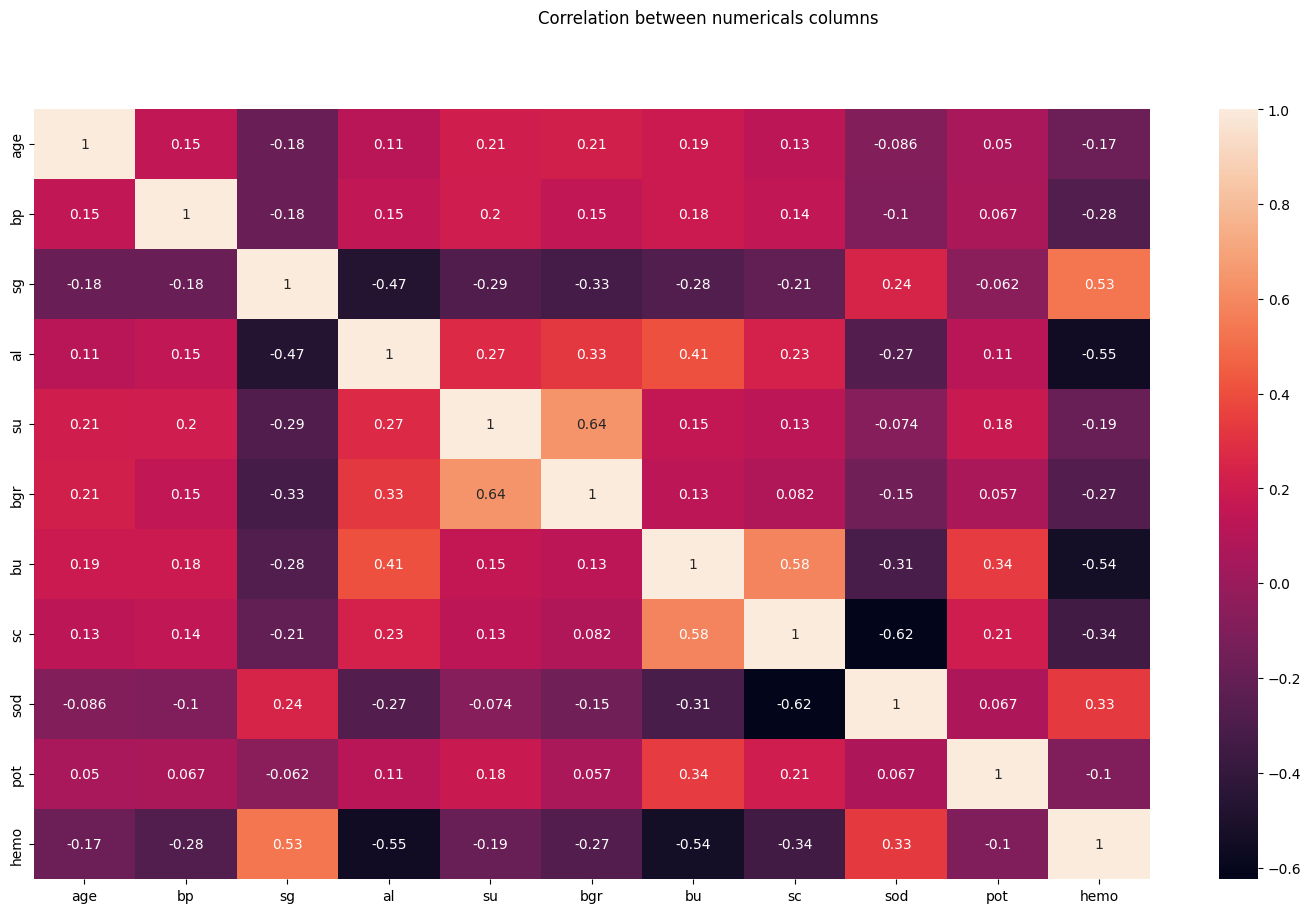

In [606]:
plt.figure(figsize=(18,10))
sns.heatmap(df[num].corr(),annot=True)
plt.suptitle("Correlation between numericals columns")
plt.show()

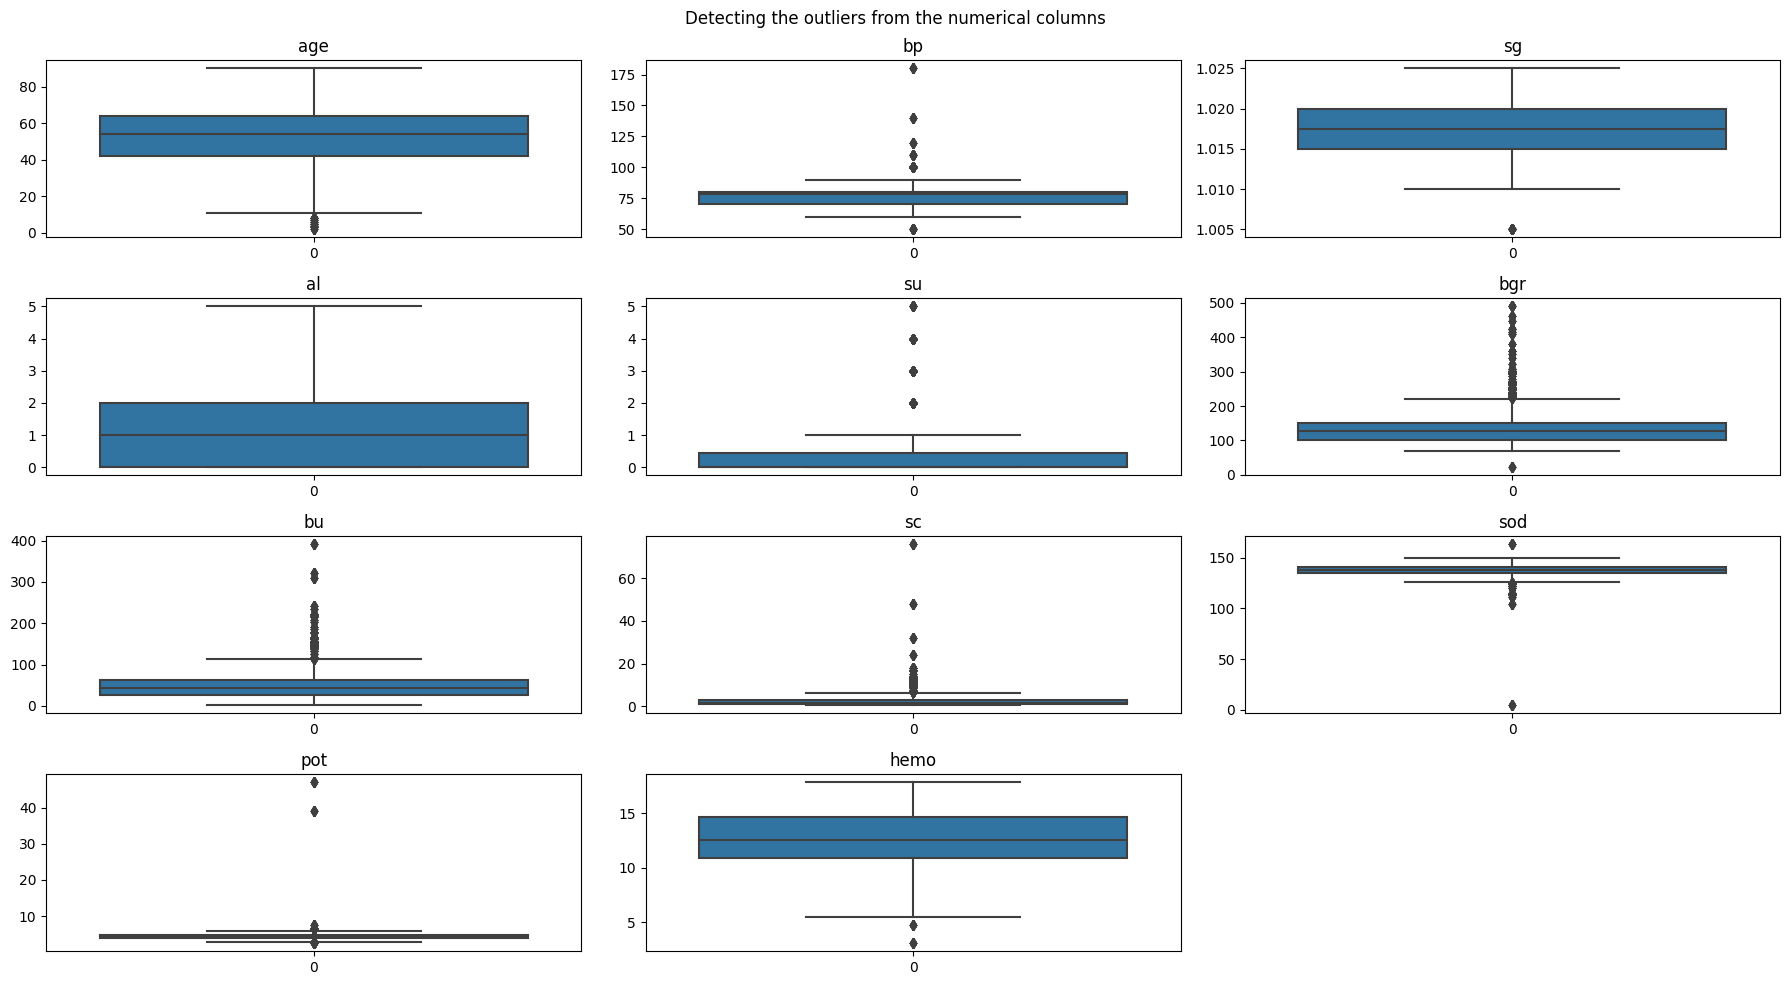

In [607]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[v])
    plt.title(v)
plt.suptitle("Detecting the outliers from the numerical columns")
plt.tight_layout()
plt.show()

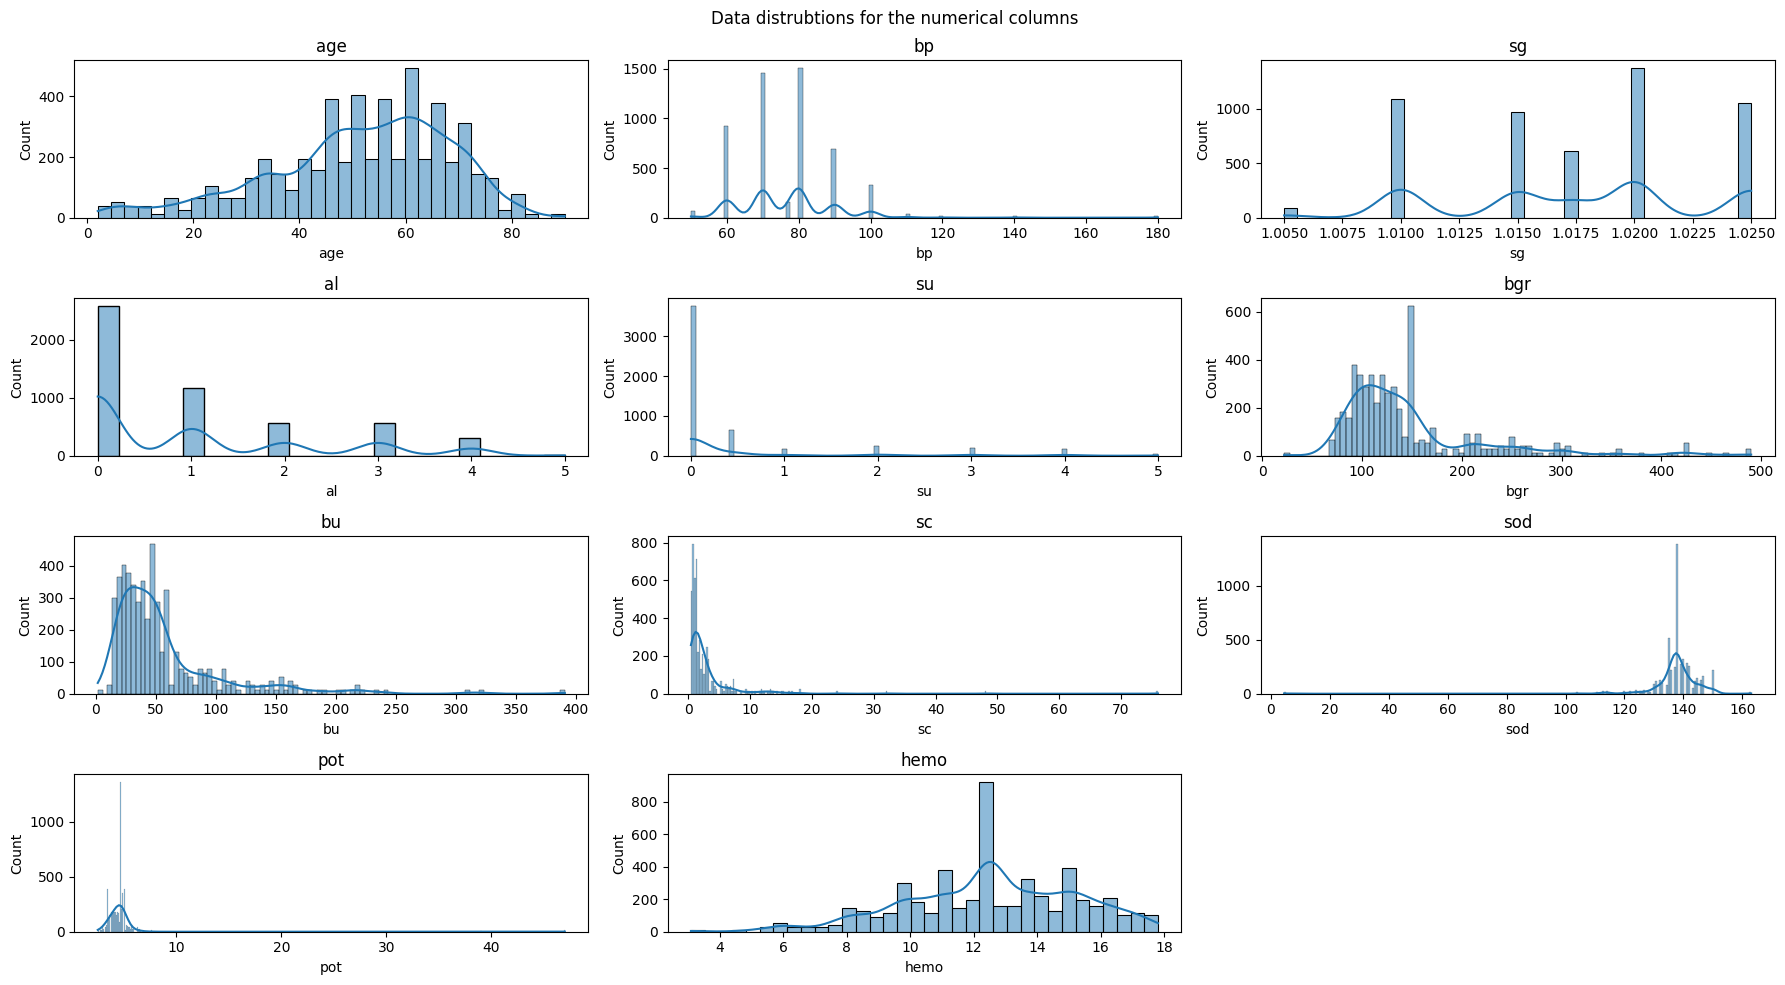

In [608]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[v],kde=True)
    plt.title(v)
plt.suptitle("Data distrubtions for the numerical columns")
plt.tight_layout()
plt.show()

In [609]:
# plt.figure(figsize=(20,10)
# sns.pairplot(df)

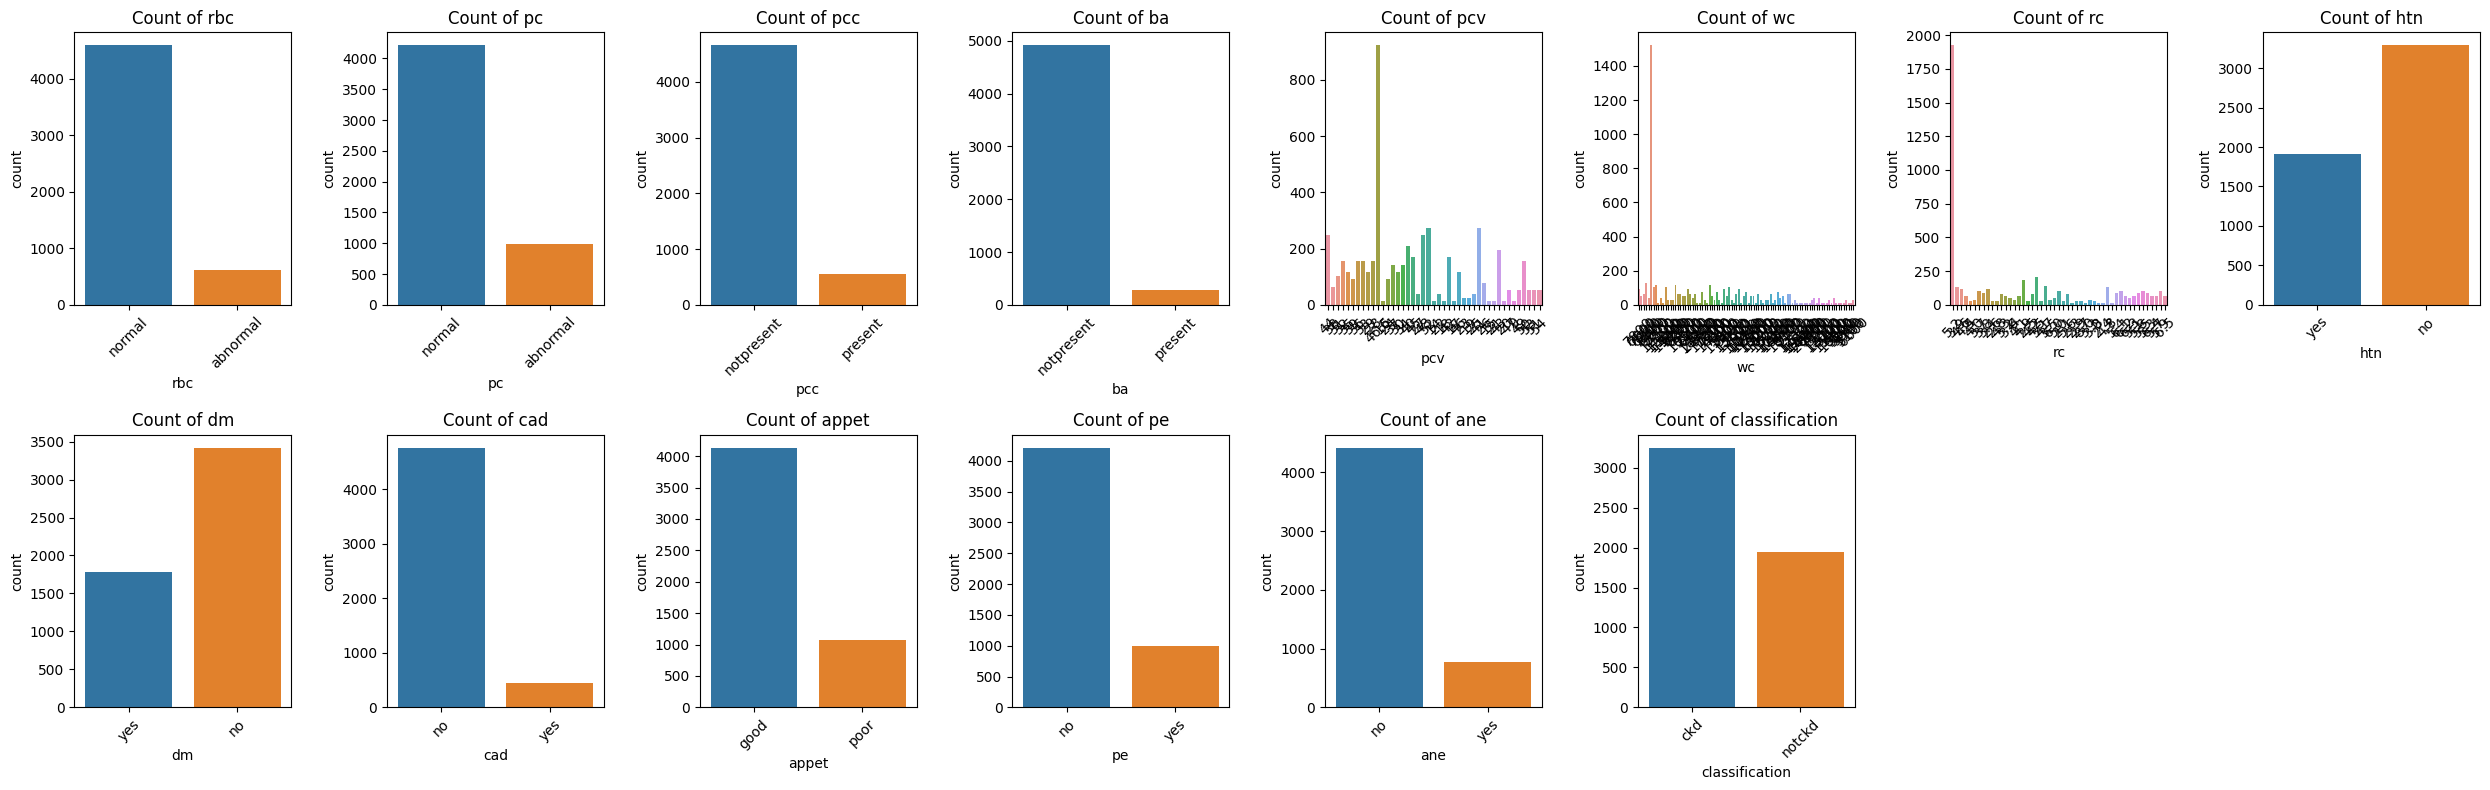

In [610]:
num_plots = len(cat)
rows = (num_plots + 7) // 8  # Calculate the number of rows needed

plt.figure(figsize=(25, rows * 4))  # Adjust the figure size based on the number of rows

for i, col in enumerate(cat, start=1):
    plt.subplot(rows, 8, i)  # Adjust the subplot position
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### **3. Data Splitting**

In [714]:
df.to_csv("Chronic_kidney_disease(clean_ds5200).csv")

In [612]:
from sklearn.model_selection import train_test_split,GridSearchCV
##preprocessing libraries from sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
## model train libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
##import the pipeline
from sklearn.pipeline import Pipeline
## importing the columnstransformer
from sklearn.compose import ColumnTransformer
##importing the model evaluations
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,roc_curve

In [613]:
new_df=df.copy()

In [614]:
new_df.shape

(5200, 25)

In [615]:
X=new_df.drop(columns='classification')
y=new_df['classification']

In [616]:
le=LabelEncoder()

In [617]:
y=le.fit_transform(y)

In [618]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [619]:
print("X_train shape:- ",X_train.shape," X_test shape:- ",X_test.shape," y_train shape:- ",y_train.shape," y_test shape:- ",y_test.shape)

X_train shape:-  (3484, 24)  X_test shape:-  (1716, 24)  y_train shape:-  (3484,)  y_test shape:-  (1716,)


#### **M-1**

In [620]:
lgr=LogisticRegression()

In [621]:
cat_i

[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [622]:
onh = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
stc=StandardScaler()

tf1=ColumnTransformer([
    ('onh',onh,[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
],remainder='passthrough')


tf2=ColumnTransformer([
    ('stc',stc,slice(0,None)),
],remainder='passthrough')

In [623]:
pipe_lgr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lgr',lgr),
])

In [624]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lgr', LogisticRegression())])

In [625]:
y_pred_lgr=pipe_lgr.predict(X_test)

In [626]:
score_lgr=accuracy_score(y_test,y_pred_lgr)
print("Score of Logistic Regression:- ",score_lgr)

Score of Logistic Regression:-  1.0


In [627]:
score_train=pipe_lgr.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [628]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



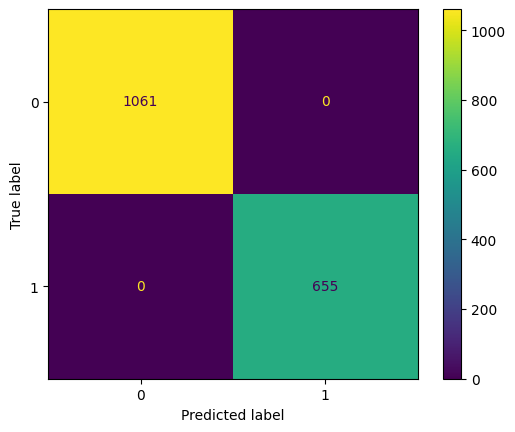

In [629]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

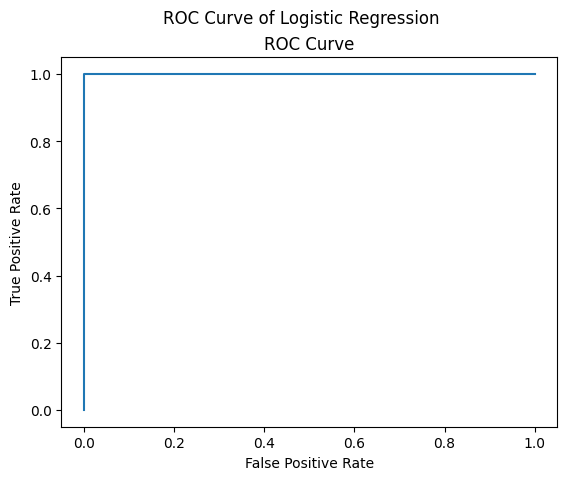

In [630]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgr)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Logistic Regression")
plt.show()

### M-2

In [631]:
knn=KNeighborsClassifier(n_neighbors=10)

In [632]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',knn)
])

In [633]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [634]:
y_pred_knn=pipe_knn.predict(X_test)

In [635]:
score_knn=accuracy_score(y_test,y_pred_knn)
print("Score of knn:- ",score_knn)

Score of knn:-  0.9906759906759907


In [636]:
score_train=pipe_knn.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  0.9971297359357061


In [637]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1061
           1       1.00      0.98      0.99       655

    accuracy                           0.99      1716
   macro avg       0.99      0.99      0.99      1716
weighted avg       0.99      0.99      0.99      1716



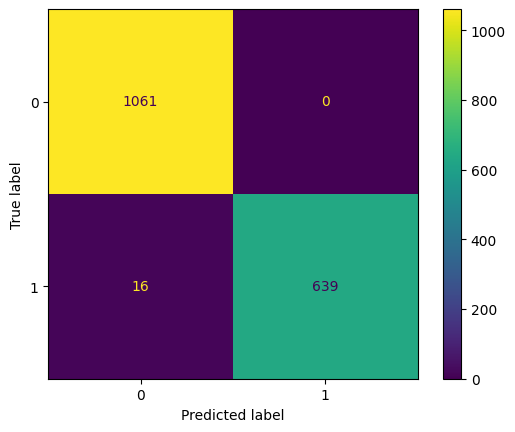

In [638]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn)).plot()

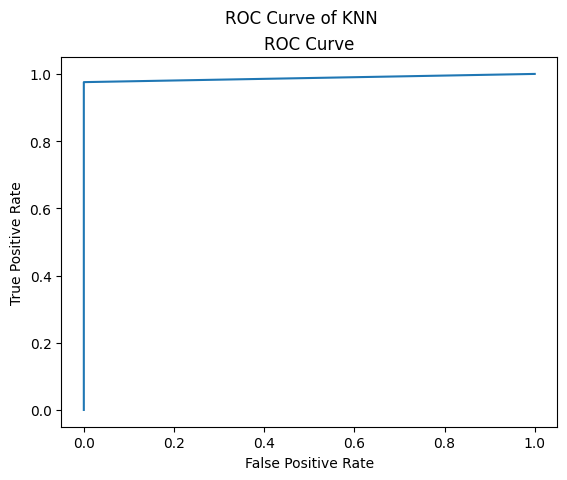

In [639]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of KNN")
plt.show()

### **M-3**

In [640]:
svc=SVC()

In [641]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [642]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC())])

In [643]:
y_pred_svc=pipe_svc.predict(X_test)

In [644]:
score_svc=accuracy_score(y_test,y_pred_svc)
print("Score of svc:- ",score_svc)

Score of svc:-  1.0


In [645]:
score_train=pipe_svc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [646]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



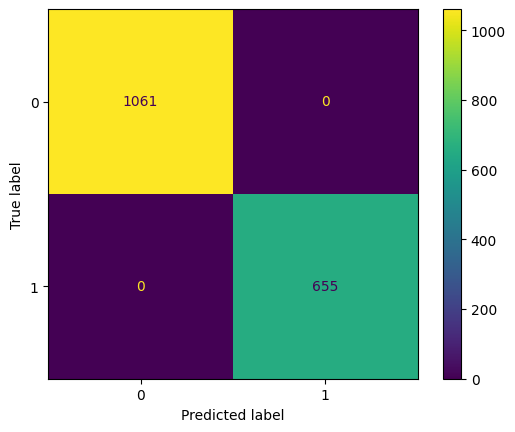

In [647]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc)).plot()

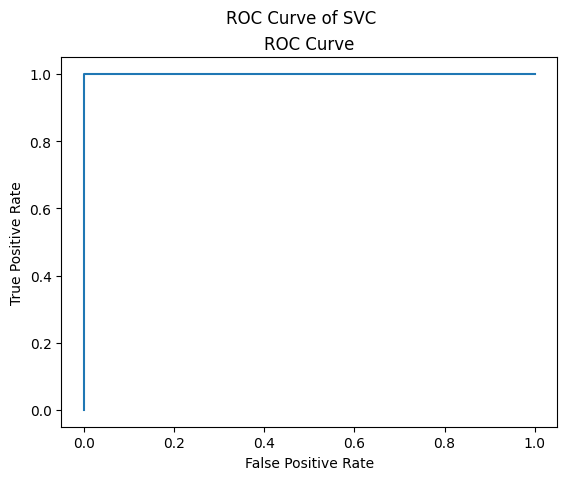

In [648]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of SVC")
plt.show()

### **M-4**

In [649]:
dtc=DecisionTreeClassifier()
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtc',dtc)
])

In [650]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [651]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [652]:
score_dtc=accuracy_score(y_test,y_pred_dtc)
print("Score of Decision tree:- ",score_dtc)

Score of Decision tree:-  1.0


In [653]:
score_train=pipe_dtc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [654]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



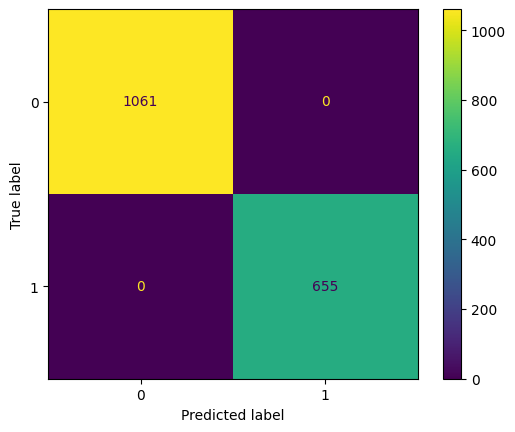

In [655]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

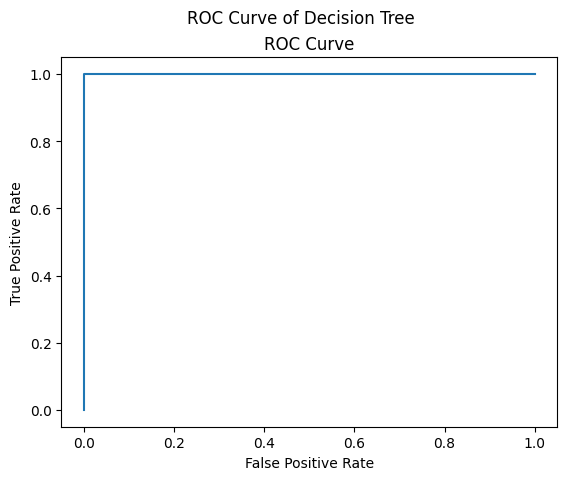

In [656]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Decision Tree")
plt.show()

### **M-5**

In [657]:
rfc=RandomForestClassifier()
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rfc',rfc)
])

In [658]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rfc', RandomForestClassifier())])

In [659]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [660]:
score_rfc=accuracy_score(y_test,y_pred_rfc)
print("Score of Random forest(Testing dataset):- ",score_rfc)

Score of Random forest(Testing dataset):-  1.0


In [661]:
score_train=pipe_rfc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [662]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



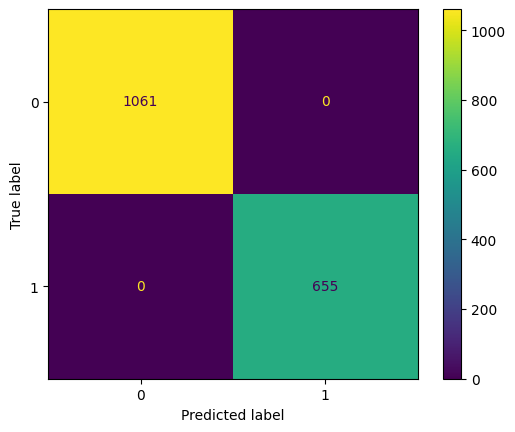

In [663]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

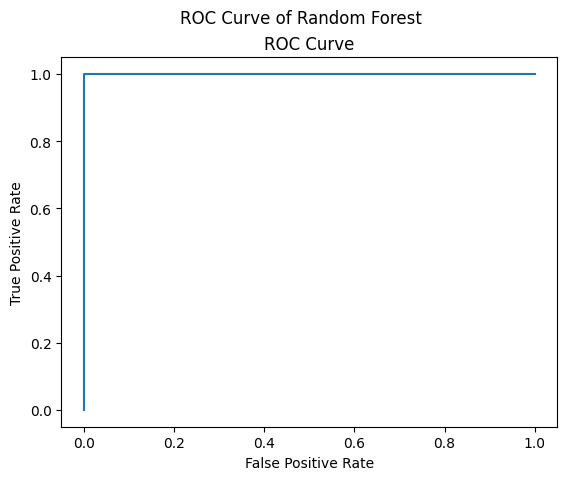

In [664]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Random Forest")
plt.show()

### **M-6**

In [665]:
bgg=BaggingClassifier(estimator=rfc)

pipe_bgg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('bgg',bgg)
])

In [666]:
pipe_bgg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('bgg', BaggingClassifier(estimator=RandomForestClassifier()))])

In [667]:
y_pred_bgg=pipe_bgg.predict(X_test)

In [668]:
score_bgg=accuracy_score(y_test,y_pred_bgg)
print("Score of Bagging with Random Forest:- ",score_bgg)

Score of Bagging with Random Forest:-  1.0


In [669]:
score_train=pipe_bgg.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [670]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



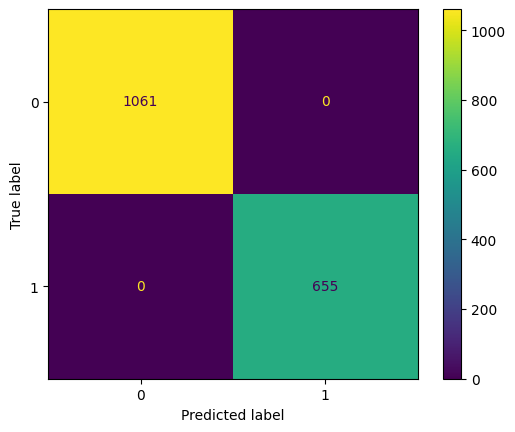

In [671]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

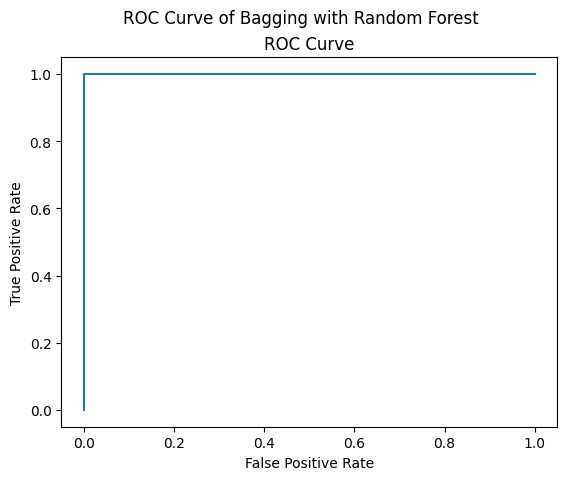

In [672]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bgg)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Bagging with Random Forest")
plt.show()

### **M-7**

In [673]:
ada=AdaBoostClassifier()
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('ada',ada)
])

In [674]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('ada', AdaBoostClassifier())])

In [675]:
y_pred_ada=pipe_ada.predict(X_test)

In [676]:
score_ada=accuracy_score(y_test,y_pred_ada)
print("Score of AdaBoosting Classifier(Testing score):- ",score_ada)

Score of AdaBoosting Classifier(Testing score):-  1.0


In [677]:
score_train=pipe_ada.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [678]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



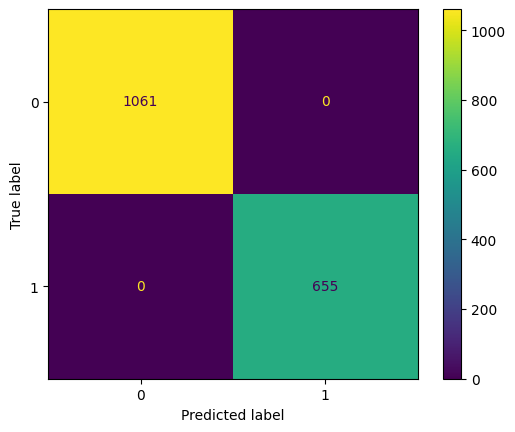

In [679]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

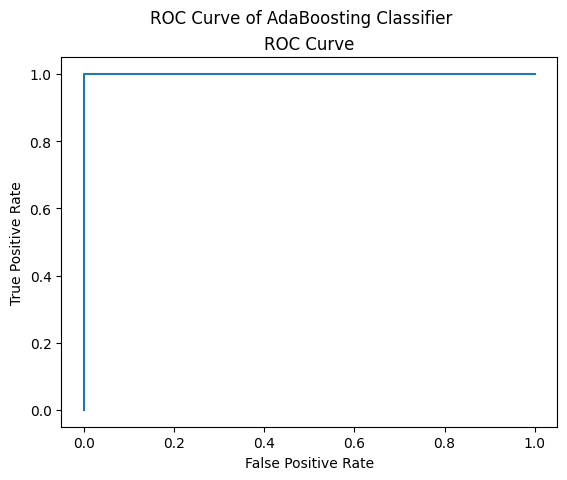

In [680]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of AdaBoosting Classifier")
plt.show()

### **M-8**

In [681]:
grd_en=GradientBoostingClassifier()

pipe_grd_en=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('grd_en',grd_en)
])

In [682]:
pipe_grd_en.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('grd_en', GradientBoostingClassifier())])

In [683]:
y_pred_grd_en=pipe_grd_en.predict(X_test)

In [684]:
score_grd=accuracy_score(y_test,y_pred_grd_en)
print("Score of Gradient BoostingClassifier:- ",score_grd)

Score of Gradient BoostingClassifier:-  1.0


In [685]:
score_train=pipe_grd_en.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


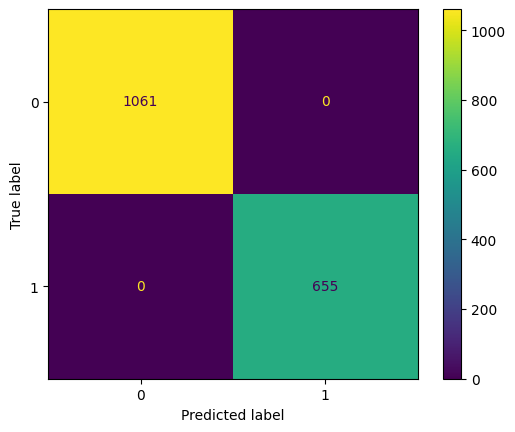

In [686]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_grd_en)).plot()

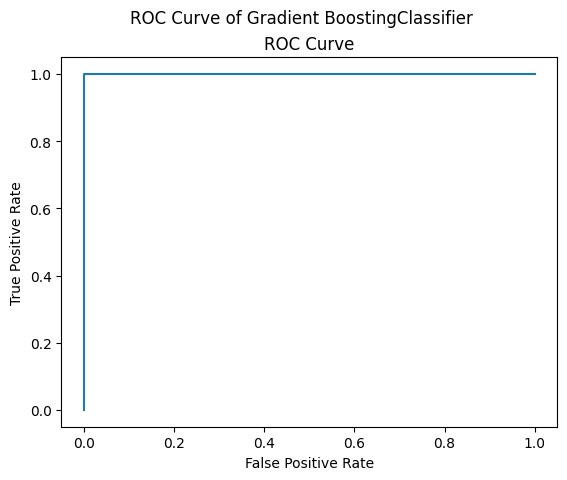

In [687]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grd_en)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Gradient BoostingClassifier")
plt.show()

### **M-9**

In [688]:
xgb=XGBClassifier()

pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgb',xgb)
])

In [689]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgb',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [690]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [691]:
score_xgb=accuracy_score(y_test,y_pred_xgb)
print("Score of XGBoosting classifier:- ",score_xgb)

Score of XGBoosting classifier:-  1.0


In [692]:
score_train=pipe_xgb.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [693]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716



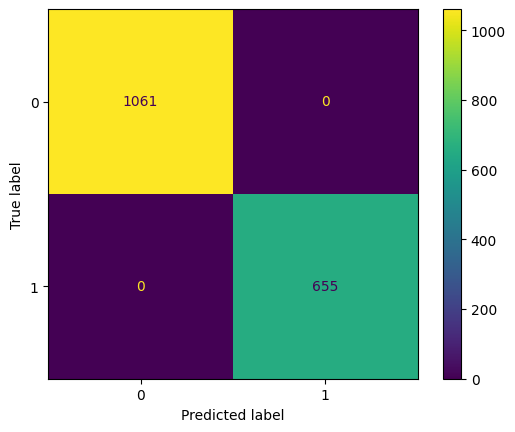

In [694]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgb)).plot()

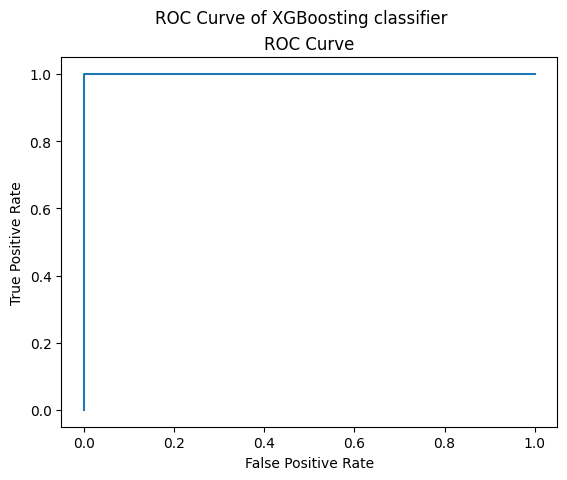

In [695]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of XGBoosting classifier")
plt.show()

In [696]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier'],
    'Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb]
}

In [697]:
pd.DataFrame(s)

,Model Name,Score
0,Logistic Regression,1.000000
1,KNN,0.990676
2,SVC,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000
5,Bagging classifier,1.000000
6,AdaBoosting Classifier,1.000000
7,Gradient_Boosting classifier,1.000000
8,XGBoosting classifier,1.000000


#### **ANN-Implementation**

In [698]:
X_train_onh=onh.fit_transform(X_train)
X_test_onh=onh.transform(X_test)

In [699]:
X_train_scaled=stc.fit_transform(X_train_onh)
X_test_scaled=stc.transform(X_test_onh)

In [700]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [701]:
##model init
model=Sequential()

##model creating
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [702]:
##model compiling
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [703]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test),batch_size=64)

Epoch 1/50
55/55 [==============================] - 3s 13ms/step - loss: 0.5937 - accuracy: 0.6995 - val_loss: 0.3266 - val_accuracy: 0.9749
Epoch 2/50
55/55 [==============================] - 0s 9ms/step - loss: 0.2650 - accuracy: 0.9170 - val_loss: 0.0837 - val_accuracy: 0.9971
Epoch 3/50
55/55 [==============================] - 0s 8ms/step - loss: 0.1307 - accuracy: 0.9750 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0731 - accuracy: 0.9914 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 5/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0516 - accuracy: 0.9948 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0383 - accuracy: 0.9940 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0235 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/50
55/55 [=

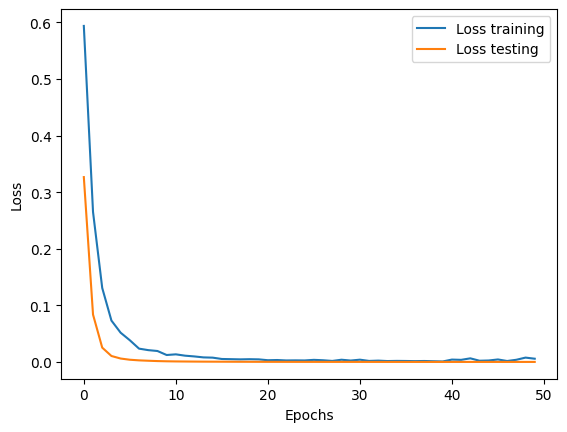

In [704]:
plt.plot(history.history['loss'],label='Loss training')
plt.plot(history.history['val_loss'],label='Loss testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

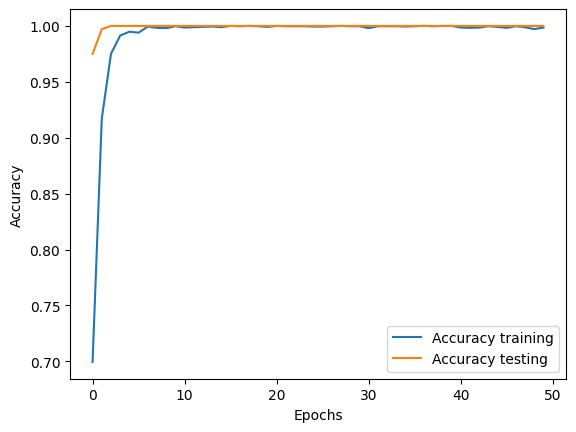

In [705]:
plt.plot(history.history['accuracy'],label='Accuracy training')
plt.plot(history.history['val_accuracy'],label='Accuracy testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [706]:
y_pred_ann=model.predict(X_test_scaled)

54/54 [==============================] - 0s 2ms/step


In [707]:
threshold=0.5

y_pred_ann=(y_pred_ann >= threshold).astype(int)

In [708]:
score_ann=accuracy_score(y_test,y_pred_ann)
print("Score of ANN(Testing):- ",score_ann)

Score of ANN(Testing):-  1.0


In [709]:
score_train=model.evaluate(X_train_scaled,y_train)
print("Score on Training dataset:- ",score_train[1])

109/109 [==============================] - 0s 2ms/step - loss: 2.0041e-05 - accuracy: 1.0000
Score on Training dataset:-  1.0


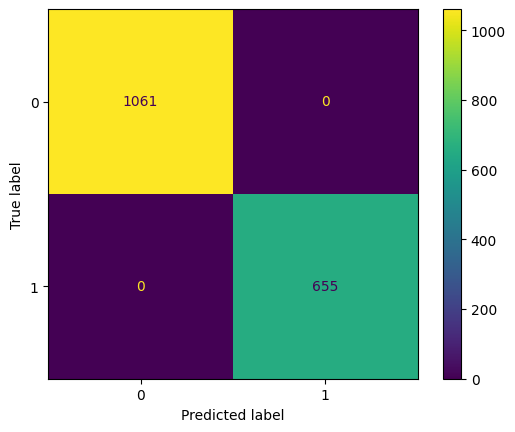

In [710]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann)).plot()

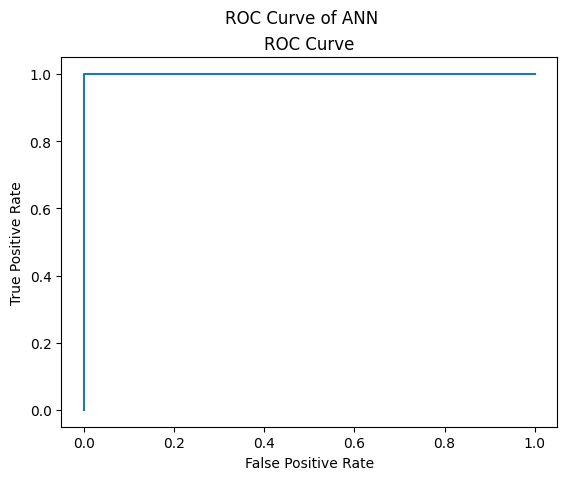

In [711]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of ANN")
plt.show()

In [712]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
    'Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann]
}

In [713]:
pd.DataFrame(s)

,Model Name,Score
0,Logistic Regression,1.000000
1,KNN,0.990676
2,SVC,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000
5,Bagging classifier,1.000000
6,AdaBoosting Classifier,1.000000
7,Gradient_Boosting classifier,1.000000
8,XGBoosting classifier,1.000000
9,ANN,1.000000
